In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 7.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=a59e9d848df788a4f89da5954bfbd19de8a701ecd66704999139a81df0b759fa
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [48]:
servico = ctrl.Antecedent(np.arange(0,11,1),'serviço')
comida = ctrl.Antecedent(np.arange(0,11,1),'comida')
gorjeta = ctrl.Consequent(np.arange(0,26,1),'gorjeta') 

In [49]:
servico.automf(3)
comida.automf(3)

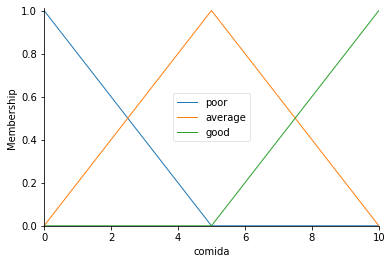

In [34]:
comida.view()

In [35]:
gorjeta['baixa']= fuzz.trimf(gorjeta.universe,[0,0,13])
gorjeta['mediana']= fuzz.trimf(gorjeta.universe,[0,13,25])
gorjeta['alta']= fuzz.trimf(gorjeta.universe,[13,25,25])

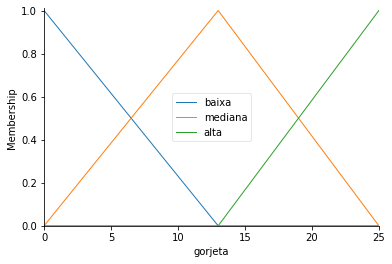

In [36]:
gorjeta.view()

In [37]:
regra1= ctrl.Rule(servico['good'] | comida['good'], gorjeta['alta'])
regra2 = ctrl.Rule(servico['average'], gorjeta['mediana'])
regra3 = ctrl.Rule(servico['poor']& comida['poor'], gorjeta['baixa'])

In [38]:
sistemaRegras = ctrl.ControlSystem([regra1, regra2, regra3])

In [42]:
sistema = ctrl.ControlSystemSimulation(sistemaRegras)

In [44]:
sistema.input['serviço'] = 9.8
sistema.input['comida']= 6.5


In [46]:
sistema.compute()

ValueError: ignored